## Few Starting notes for tensorflow NN model

* one hot encode categorical features. If a feature is not numeric, then we need to make sure its one hot encoded.

* There is no advantage to normalising one-hot encoded features.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [3]:
# General Data extractor
def load_data(file):
  return pd.read_csv(file, header = None, names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education No.',
                      'Marital-Status', 'Occupation', 'Relationship',
                      'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
                      'Hours-per-week', 'Native-Country', 'Income'])

###################################################################################################

## **NON-GROUPED DATA SET**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data
Saving adult.test to adult.test


In [4]:
# load the dataset
fledged = load_data('adult.data')
# Drop education no. column as it correlates exactly with education
# education no. has numeric values in its column, but it is important to note that
# these values are categorical in nature, and possess no inherent ordering (as actual numeric values do)
fledged = fledged.drop('Education No.', axis = 1)
fledged.head()

,Age,Workclass,fnlwgt,Education,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
fledged.dropna()
# Remove whitespace
for col in ['Workclass', 'Occupation', 'Native-Country']:
    fledged[col] = fledged[col].str.strip()
# Remove ? values
fledged = (fledged[(fledged['Workclass'] != '?')&
                   (fledged['Occupation'] != '?') &
                   (fledged['Native-Country'] != '?')&
                   (fledged['Workclass'] != 'Without-pay')])

Data set has 14 attributes and 2 labels (>50k, <=50k). This is therefore a binary problem, and we are working with binary classication. 

We will have to one-hot encode the labels as they are non-numeric. 
We will also have to one-hot encode all categorical attributes. At a glance, it seems like most of the attributes are categorical.

Consider using loss function categorical_crossentropy and Adam optimizer. If not, then try sparse_categorical_crossentropy.(if this was a multivariate problem)

Since this is a binary classification problem, we will use loss function binary_crossentropy and choose optimizer function accordingly.

Set the **initial lr=0.001**, worst case, define a learning rate call back function to find optimal initial learning rate for adam optimizer.

We can onehot encode using the OneHotEncoder from sklearn.preprocessing, or we can use the pandas.get_dummies methodology.

Here, we will perform both and compare to ensure successful one-hot encoding.

As we can see, only 6 of the columns have numerical values which df.describe().transpose() can call out.

After one hot encoding, we should hope to see all 15 columns called out.


In [7]:
# List of categorical columns to one-hot encode
Categoricals = ['Workclass', 'Education', 'Marital-Status',
                'Occupation', 'Relationship', 'Race',
                'Sex', 'Native-Country']
# one-hot encode each column
for col in Categoricals:
  one_hot = pd.get_dummies(fledged[col], prefix=col)
# Concatenate the one-hot encoded column back into the original df
  fledged = pd.concat([fledged, one_hot], axis = 1)
  fledged = fledged.drop(col, axis=1)

Encode 'income' column as binary. There is no need to one-hot encode as the
'income' column represents ordinal data.

In [8]:
# preprocess by stripping the string type label column and encoding as binary.
# Comment out this cell after running
fledged['Income'] = fledged['Income'].str.strip().str.lower()
fledged['Income'] = fledged['Income'].replace({'>50k': 1, '<=50k': 0})
fledged['Income'] = fledged['Income'].astype(int)

In [9]:
fledged.head()

,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,...,Native-Country_Portugal,Native-Country_Puerto-Rico,Native-Country_Scotland,Native-Country_South,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Vietnam,Native-Country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization

* Age has a fairly symmetric distribution, so min-max normalization could work well. Alternatively, you could use z-score normalization, which would standardize the values to have a mean of 0 and a standard deviation of 1.

* Capital Gain and Capital Loss: These features have a heavy-tailed distribution with a long right tail, so it would be better to use a log transformation to reduce the effect of outliers and then use z-score normalization.

* Hours per week: This feature has a slightly skewed distribution, so z-score normalization may be appropriate.

In [10]:
# Perform min-max normalization on Age
age_min = fledged['Age'].min()
age_max = fledged['Age'].max()
fledgeNorm_ = fledged.copy()
fledgeNorm_['Age'] = (fledgeNorm_['Age'] - age_min) / (age_max - age_min)

fnl_min = fledged['fnlwgt'].min()
fnl_max = fledged['fnlwgt'].max()
fledgeNorm_['fnlwgt'] = (fledgeNorm_['fnlwgt'] - fnl_min) / (fnl_max - fnl_min)

# Perform log transformation on Capital-Gain and Capital-Loss, then z-score normalization
fledgeNorm_['Capital-Gain'] = np.log(fledgeNorm_['Capital-Gain'] + 1)  # add 1 to avoid division by zero
fledgeNorm_['Capital-Loss'] = np.log(fledgeNorm_['Capital-Loss'] + 1)
cg_mean = fledgeNorm_['Capital-Gain'].mean()
cg_std = fledgeNorm_['Capital-Gain'].std()
fledgeNorm_['Capital-Gain'] = (fledgeNorm_['Capital-Gain'] - cg_mean) / cg_std
cl_mean = fledgeNorm_['Capital-Loss'].mean()
cl_std = fledgeNorm_['Capital-Loss'].std()
fledgeNorm_['Capital-Loss'] = (fledgeNorm_['Capital-Loss'] - cl_mean) / cl_std

# Perform z-score normalization on Hours-per-week
hpw_mean = fledgeNorm_['Hours-per-week'].mean()
hpw_std = fledgeNorm_['Hours-per-week'].std()
fledgeNorm_['Hours-per-week'] = (fledgeNorm_['Hours-per-week'] - hpw_mean) / hpw_std

In [11]:
fledgeNorm_.head()

,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,...,Native-Country_Portugal,Native-Country_Puerto-Rico,Native-Country_Scotland,Native-Country_South,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Vietnam,Native-Country_Yugoslavia
0,0.301370,0.043338,2.809889,-0.222765,-0.078077,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.047277,-0.300955,-0.222765,-2.332580,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.137244,-0.300955,-0.222765,-0.078077,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.150212,-0.300955,-0.222765,-0.078077,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.220703,-0.300955,-0.222765,-0.078077,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# NON-NORMALIZED
# 80:20 split
pre_train = fledged.sample(frac=0.8, random_state=42)
pre_val = fledged.drop(pre_train.index)
# split the labels from the rest of the features
pretrain_features = pre_train.copy()
preval_features = pre_val.copy()

pretrain_labels = pretrain_features.pop('Income')
preval_labels = preval_features.pop('Income')

In [14]:
# NORMALIZED
# we perform the standard 80% 20% train validation data split
fledge_train = fledgeNorm_.sample(frac=0.8, random_state=42)
fledge_validation = fledgeNorm_.drop(fledge_train.index)
# split the labels from the rest of the features
train_features = fledge_train.copy()
val_features = fledge_validation.copy()

train_labels = train_features.pop('Income')
val_labels = val_features.pop('Income')

In [ ]:
# callback function
class StopOnPoint(tf.keras.callbacks.Callback):
    def __init__(self, point):
        super(StopOnPoint, self).__init__()
        self.point = point

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["accuracy"]
        if accuracy >= self.point:
            self.model.stop_training = True

# callbacks = [StopOnPoint(0.87)]

In [ ]:
# Build the model
# Note: this model is normalized, to attempt pre-norm model just change dataframe in above cells to create labels and feats for pre-norm
Norm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape=(train_features.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    # tf.keras.layers.Dropout(0.2),
  # tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dropout(0.2),
 # tf.keras.layers.Dense(16, activation = 'relu'),
    # sigmoid activation for binary classification problem
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

Norm_model.compile(loss='binary_crossentropy',
                      #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics = ['accuracy'])

history = Norm_model.fit(train_features, train_labels, epochs=15,
                  batch_size = 16, validation_data = (val_features, val_labels),
                  callbacks = [StopOnPoint(0.87)])

Epoch 1/15
1508/1508 [==============================] - 8s 4ms/step - loss: 0.3518 - accuracy: 0.8341 - val_loss: 0.3382 - val_accuracy: 0.8430
Epoch 2/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.3326 - accuracy: 0.8452 - val_loss: 0.3322 - val_accuracy: 0.8430
Epoch 3/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.3238 - accuracy: 0.8490 - val_loss: 0.3296 - val_accuracy: 0.8448
Epoch 4/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.3175 - accuracy: 0.8533 - val_loss: 0.3239 - val_accuracy: 0.8464
Epoch 5/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.3111 - accuracy: 0.8551 - val_loss: 0.3258 - val_accuracy: 0.8494
Epoch 6/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.3048 - accuracy: 0.8577 - val_loss: 0.3305 - val_accuracy: 0.8423
Epoch 7/15
1508/1508 [==============================] - 7s 5ms/step - loss: 0.3010 - accuracy: 0.8577 - val_loss: 0.3298 - val_accuracy:

In [ ]:
# Build the model
# Note: this model is non-normalized, to attempt norm model just change dataframe in above cells to create labels and feats for pre-norm
# Update: now just refer to above codeblock for model trained on normalized data (accuracy increase is approx 10%)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape=(train_features.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    # tf.keras.layers.Dropout(0.2),
  # tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dropout(0.2),
 # tf.keras.layers.Dense(16, activation = 'relu'),
    # sigmoid activation for binary classification problem
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy',
                      #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics = ['accuracy'])

history1 = model.fit(pretrain_features, pretrain_labels, epochs=15,
                  batch_size = 16, validation_data = (preval_features, preval_labels),
                  callbacks = [StopOnPoint(0.87)])

Epoch 1/15
1508/1508 [==============================] - 8s 4ms/step - loss: 135.2231 - accuracy: 0.6704 - val_loss: 18.4236 - val_accuracy: 0.7745
Epoch 2/15
1508/1508 [==============================] - 6s 4ms/step - loss: 29.9971 - accuracy: 0.6754 - val_loss: 6.9797 - val_accuracy: 0.7837
Epoch 3/15
1508/1508 [==============================] - 6s 4ms/step - loss: 3.5669 - accuracy: 0.6887 - val_loss: 2.8999 - val_accuracy: 0.7836
Epoch 4/15
1508/1508 [==============================] - 6s 4ms/step - loss: 1.2616 - accuracy: 0.7109 - val_loss: 1.6939 - val_accuracy: 0.7856
Epoch 5/15
1508/1508 [==============================] - 7s 4ms/step - loss: 0.7410 - accuracy: 0.7439 - val_loss: 0.5369 - val_accuracy: 0.7559
Epoch 6/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.9366 - accuracy: 0.7505 - val_loss: 0.5647 - val_accuracy: 0.7579
Epoch 7/15
1508/1508 [==============================] - 6s 4ms/step - loss: 0.5550 - accuracy: 0.7589 - val_loss: 0.5553 - val_accur

189/189 [==============================] - 0s 2ms/step


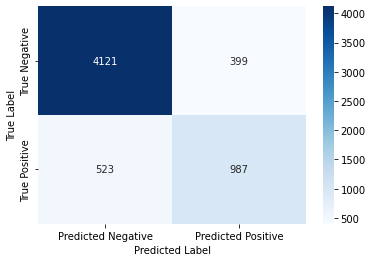

In [ ]:
# NORMALIZED CONFUSION MATRIX
Normpred = Norm_model.predict(val_features)
Normpreds = (Normpred > 0.5).astype(int)
NNconf = confusion_matrix(val_labels, Normpreds)
NNconf_df = pd.DataFrame(NNconf, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(NNconf_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

189/189 [==============================] - 1s 3ms/step


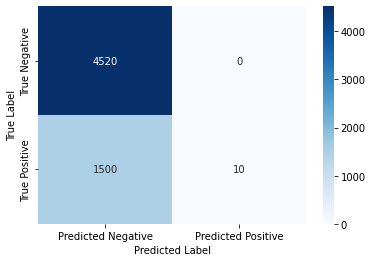

In [ ]:
# NON_NORMALIZED CONFUSION
pred = model.predict(preval_features)
preds = (pred > 0.5).astype(int)
Nconf = confusion_matrix(preval_labels, preds)
Nconf_df = pd.DataFrame(Nconf, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(Nconf_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the scores
accuracy = accuracy_score(preval_labels, preds)
precision = precision_score(preval_labels, preds)
recall = recall_score(preval_labels, preds)
f1 = f1_score(preval_labels, preds)

# Create the DataFrame
scores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Define a function to add background color based on the scores
def add_bg_color(val):
    color = 'white'
    if val > 0.8:
        color = '#55a868'  # green
    elif val > 0.6:
        color = '#a1d99b'  # light green
    elif val > 0.4:
        color = '#fdae61'  # orange
    elif val > 0.2:
        color = '#f46d43'  # light red
    else:
        color = '#d73027'  # red
    return f'background-color: {color}'

# Format the DataFrame using Styler
scores_df_styled = (scores_df.style
                   .format({'Score': '{:.2%}'})  # Format the scores as percentage
                   .applymap(add_bg_color, subset=['Score'])  # Add background color
                   .set_properties(**{'text-align': 'center', 'font-size': '16px'})  # Set text alignment and font size
                   .set_table_styles([
                       {'selector': 'th', 'props': [
                           ('background-color', '#303030'),  # header background color
                           ('color', 'white'),  # header text color
                           ('font-size', '16px'),  # header font size
                       ]},
                       {'selector': 'th.col_heading', 'props': [
                           ('background-color', '#2f4f4f'),  # Metric column background color
                       ]},
                   ])
                  )

# Display the styled DataFrame
scores_df_styled

,Metric,Score
0,Accuracy,75.12%
1,Precision,100.00%
2,Recall,0.66%
3,F1 Score,1.32%


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# NORMALIZED-SCORES
accuracy = accuracy_score(val_labels, Normpreds)
precision = precision_score(val_labels, Normpreds)
recall = recall_score(val_labels, Normpreds)
f1 = f1_score(val_labels, Normpreds)

# Create the DataFrame
Nscores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Format the DataFrame using Styler
Nscores_df_styled = (Nscores_df.style
                   .format({'Score': '{:.2%}'})  # Format the scores as percentage
                   .applymap(add_bg_color, subset=['Score'])  # Add background color
                   .set_properties(**{'text-align': 'center', 'font-size': '16px'})  # Set text alignment and font size
                   .set_table_styles([
                       {'selector': 'th', 'props': [
                           ('background-color', '#303030'),  # header background color
                           ('color', 'white'),  # header text color
                           ('font-size', '16px'),  # header font size
                       ]},
                       {'selector': 'th.col_heading', 'props': [
                           ('background-color', '#2f4f4f'),  # Metric column background color
                       ]},
                   ])
                  )

# Display the styled DataFrame
Nscores_df_styled


,Metric,Score
0,Accuracy,84.71%
1,Precision,71.21%
2,Recall,65.36%
3,F1 Score,68.16%


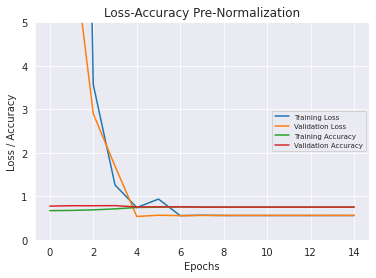

In [ ]:
# plot loss-accuracy curves for visualization
sns.set_style('darkgrid')  # Set the plot style

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.legend(loc='center right', fontsize=7)  # Add a legend
plt.title('Loss-Accuracy Pre-Normalization')  # Add a title
plt.xlabel('Epochs')  # Add x-axis label
plt.ylabel('Loss / Accuracy')  # Add y-axis label
plt.ylim([0, 5])  # Set y-axis limits to better visualize changes in the metrics

plt.show()
plt.close()


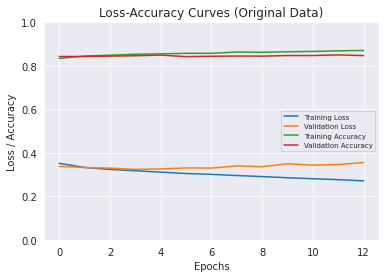

In [ ]:

sns.set_style('darkgrid')  # Set the plot style

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend(loc='center right', fontsize=7)  # Add a legend
plt.title('Loss-Accuracy Curves (Original Data)')  # title here includes (original data) as we will compare it against grouping later
plt.xlabel('Epochs')  # Add x-axis label
plt.ylabel('Loss / Accuracy')  # Add y-axis label
plt.ylim([0, 1])  # Set y-axis limits to better visualize changes in the metrics

plt.show()
plt.close()


## Non-Grouped Random Forest Model


In general, Random Forest models do not require data normalization as the algorithm is not sensitive to the scale of the features. However, normalization can still be beneficial in some cases, such as when there are large differences in the scales of the features or when using regularization methods like L1 or L2 regularization. Normalization can help ensure that the regularization penalty is applied equally to all features.

Additionally, some other machine learning algorithms, such as K-Nearest Neighbors or Support Vector Machines, are more sensitive to the scale of the input features and therefore require normalization to ensure the features are on a similar scale.

So, while it is not strictly necessary to normalize the data before fitting a Random Forest classifier, it may still be a good practice to do so, especially if we have features on different scales. We can try both normalized and non-normalized data and see if normalization improves the performance of the model.

In [15]:
# Forest model
Fmodel = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit with non-normalized data
Fmodel.fit(pretrain_features, pretrain_labels)
Fmodel.score(preval_features, preval_labels)

0.8552238805970149

the preval_features data is not entirely unseen, as it was used during the model selection process. However, the preval_features were not used in the training of the model itself, so the model should not have learned the specific patterns or relationships in this data.

The purpose of the validation set is to evaluate the model's performance on data that is separate from the training set, so you can assess how well the model is generalizing to new, unseen data. In this case, you are using the Fmodel.score() method to calculate the accuracy of the model on the validation set, which can give you an indication of how well the model is performing on unseen data.

It is worth noting that if you use the validation set repeatedly during the model selection process (for example, if you use it to tune hyperparameters or to evaluate different models), you risk overfitting to the validation set. In this case, you may want to use a separate test set that is truly unseen until the final model selection process. This can help to ensure that you are not biasing your model selection process based on a particular set of validation data.






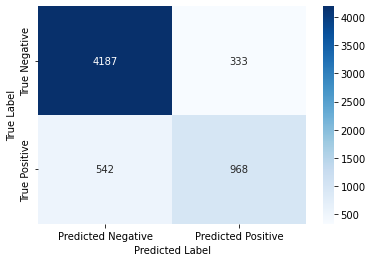

In [16]:
# New model
FmodelNorm = RandomForestClassifier(n_estimators=100, random_state=42)
# FIt with normalized data
FmodelNorm.fit(train_features, train_labels)
FmodelNorm.score(val_features, val_labels)
val_pred_ = FmodelNorm.predict(val_features)
conf_=confusion_matrix(val_labels, val_pred_)
confNorm = pd.DataFrame(conf_, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(confNorm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# NORMALIZED-SCORES
accuracy = accuracy_score(val_labels, val_pred_)
precision = precision_score(val_labels, val_pred_)
recall = recall_score(val_labels, val_pred_)
f1 = f1_score(val_labels, val_pred_)

# Create the DataFrame
Nscores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Format the DataFrame using Styler
Nscores_df_styled = (Nscores_df.style
                   .format({'Score': '{:.2%}'})  # Format the scores as percentage
                   .applymap(add_bg_color, subset=['Score'])  # Add background color
                   .set_properties(**{'text-align': 'center', 'font-size': '16px'})  # Set text alignment and font size
                   .set_table_styles([
                       {'selector': 'th', 'props': [
                           ('background-color', '#303030'),  # header background color
                           ('color', 'white'),  # header text color
                           ('font-size', '16px'),  # header font size
                       ]},
                       {'selector': 'th.col_heading', 'props': [
                           ('background-color', '#2f4f4f'),  # Metric column background color
                       ]},
                   ])
                  )

# Display the styled DataFrame
Nscores_df_styled


,Metric,Score
0,Accuracy,85.49%
1,Precision,74.40%
2,Recall,64.11%
3,F1 Score,68.87%


###################################################################################################

## Ideas for future models:

The following is not either or, we can use both.

* Consider modifying the dataset:
  * capital = capital gain - capital loss
  * Ages can be split into categories? 4 categories let's say
  * Countries become USA and NON-USA ?

* Consider different model architectures:
 * dropout layers
 * regularization
 * Functional API?

## Comparison Ideas:

* Compare the same model architecture with differently preprocessed data (e.g. one with the full one-hot encoded columns (104) and the other with grouped columns before one-hot encoding (USA and Non-USA, Age, Marital Status etc..))
  * Call the datasets grouped and non-grouped.

* Compare the same model architecture but with the number of predictors used in the classification tree that they present in the R code output.
  * Compare classification error and accuracy of the two models. Here: the dataset will be the same.
  

### The Comparisons:

Grouped:

* TF model against tree-based (accuracy)

* TF model against Non-grouped TF model

Non-Grouped:

* TF model against tree-based (accuracy)

Other:

* TF model against tree-based with equal predictors

* TF model against TF model (re-architectured)

###################################################################################################

##  **GROUPED DATA SET**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Helper functions to group the adult data set
# We use these for alternative analyses
# Specific data extractor
def load_data(file):
  return pd.read_csv(file, header = None, names = ['Age', 'Workclass', 'fnlwgt',
                                                   'Education', 'Education No.',
                      'Marital-Status', 'Occupation', 'Relationship',
                      'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
                      'Hours-per-week', 'Native-Country', 'Income'])

# Encode Countries
def encode_country(country):
    if country == "United-States":
        return "USA"
    else:
        return "Non-USA"

# Categorize age
def categorize_age(age):
    if age <= 30:
        return '<=30'
    elif age <= 45:
        return '30-45'
    elif age <= 60:
        return '45-60'
    else:
        return '>60'

# Categorize workclass
def categorize_workclass(workclass):
    if workclass in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-emp'
    elif '-gov' in workclass:
        return 'Gov'
    elif workclass == 'Private':
        return 'Private'
    else:
        return 'Other'

# Categorize marriage
def categorize_marriage(m):
    if m in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
      return 'Married'
    elif m == 'Divorced':
      return 'Divorced'
    elif m == 'Never-Married':
      return 'Never-Married'
    elif m == 'Separated':
      return 'Separated'
    elif m == 'Widowed':
      return 'Widowed'
    # else:
    #   return 'Other'

# group education: before university, Undergraduate, Postgraduate, Associate
# HS-grad, some-college, 
def EduClear(x):
  if x in ['Preschool', '1st-4th', '5th-6th', '9th', '10th','11th', '12th', '7th-8th']:
    return 'Before-University'
  elif x in ['Assoc-voc', 'Assoc-acdm']:
    return 'Associate'
  elif x in ['Masters', 'Prof-school', 'Doctorate']:
    return 'Postgraduate'
  elif x == 'Bachelors':
    return 'Undergraduate'
  elif x == 'HS-grad':
    return 'HS-grad'
  elif x == 'Some-college':
    return 'Some-college'



In [ ]:
grouped = load_data('adult.data')
# grouped = grouped.drop('Education No.', axis =  1)
# grouped.head()

In [ ]:
# Remove all whitespaces and ? mark values
grouped.dropna()
# Remove whitespace
for col in ['Workclass', 'Occupation', 'Native-Country', 'Marital-Status', 'Education']:
    grouped[col] = grouped[col].str.strip()

# Remove ? values
grouped = (grouped[(grouped['Workclass'] != '?')&
                   (grouped['Occupation'] != '?') &
                   (grouped['Native-Country'] != '?')&
                   (grouped['Workclass'] != 'Without-pay')])

Clean 'Workclass' into 4 categories, 'Gov', 'Self-emp', 'Private' and 'Other'.

In [ ]:
grouped['Workclass'] = grouped['Workclass'].apply(categorize_workclass)
grouped['Workclass'].value_counts()

Private     22286
Gov          4289
Self-emp     3573
Name: Workclass, dtype: int64

Categorize 'Marital-Status' into Married, Divorced, Never-Married, Separated, Widowed

In [ ]:
grouped['Marital-Status'] = grouped['Marital-Status'].apply(categorize_marriage)
grouped['Marital-Status'].value_counts()

Married      14447
Divorced      4214
Separated      939
Widowed        826
Name: Marital-Status, dtype: int64

Categorize Education into Before-University, Undergraduate, Postgraduate, Associate, HS-grad, Some-college

In [ ]:
grouped['Education'] = grouped['Education'].apply(EduClear)
grouped['Education'].value_counts()

HS-grad              9831
Some-college         6675
Undergraduate        5044
Before-University    3740
Postgraduate         2544
Associate            2314
Name: Education, dtype: int64

Categorize native country into USA and Non-USA. This is because the majority of the value counts in said column are USA.

In [ ]:
grouped['Native-Country'] = grouped['Native-Country'].apply(encode_country)
grouped['Native-Country'].value_counts()

USA        27491
Non-USA     2657
Name: Native-Country, dtype: int64

Our Final bit of grouping will require us to:

* Capital = Capital-gain - capital loss
* drop the education no., capital-gain, and capital - loss columns.

In [ ]:
grouped['Capital'] = grouped['Capital-Gain'] - grouped['Capital-Loss']

In [ ]:
grouped = grouped.drop('Capital-Gain', axis=1)
grouped = grouped.drop('Capital-Loss', axis=1)
grouped = grouped.drop('Education No.', axis=1)
# grouped.head()

In [ ]:
Categoricals = ['Workclass', 'Education', 'Marital-Status',
                'Occupation', 'Relationship', 'Race',
                'Sex', 'Native-Country']

# one-hot encode each categorical column
for col in Categoricals:
  one_hot = pd.get_dummies(grouped[col], prefix=col)
# Concatenate the one-hot encoded column back into the original df
  grouped = pd.concat([grouped, one_hot], axis = 1)
  grouped = grouped.drop(col, axis=1)

# grouped.head()

In [ ]:
# preprocess by stripping the string type label column and encoding as binary.
# Comment out this cell after running
grouped['Income'] = grouped['Income'].str.strip().str.lower()
grouped['Income'] = grouped['Income'].replace({'>50k': 1, '<=50k': 0})
grouped['Income'] = grouped['Income'].astype(int)
grouped.head()

,Age,fnlwgt,Hours-per-week,Income,Capital,Workclass_Gov,Workclass_Private,Workclass_Self-emp,Education_Associate,Education_Before-University,...,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native-Country_Non-USA,Native-Country_USA
0,39,77516,40,0,2174,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,40,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,40,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


We have 47 columns post grouping and one-hot encoding, lets train it on the same model architecture as the non grouped data set

In [ ]:
# Copy the 'grouped' dataframe to a new dataframe called 'groupNorm_'
groupNorm_ = grouped.copy()

# Perform min-max normalization on Age
age_min = groupNorm_['Age'].min()
age_max = groupNorm_['Age'].max()
groupNorm_['Age'] = (groupNorm_['Age'] - age_min) / (age_max - age_min)

# Min-Max normalize final weight
ag_min = groupNorm_['fnlwgt'].min()
ag_max = groupNorm_['fnlwgt'].max()
groupNorm_['fnlwgt'] = (groupNorm_['fnlwgt'] - ag_min) / (ag_max - ag_min)

# # Capital is derived from 'Capital-Gain' and 'Capital-Loss', therefore we 
# # normalize the feature by performing z-score normalization. 
# # Perform log transformation on 'Capital', then z-score normalization
# groupNorm_['Capital'] = np.log(groupNorm_['Capital'] + 1)  # add 1 to avoid division by zero
# c_mean = groupNorm_['Capital'].mean()
# c_std = groupNorm_['Capital'].std()
# groupNorm_['Capital'] = (groupNorm_['Capital'] - c_mean) / c_std

# # Perform z-score normalization on Hours-per-week
# hpw_mean = groupNorm_['Hours-per-week'].mean()
# hpw_std = groupNorm_['Hours-per-week'].std()
# groupNorm_['Hours-per-week'] = (groupNorm_['Hours-per-week'] - hpw_mean) / hpw_std

In [ ]:
# NORMALIZED
# we perform the standard 80% 20% train validation data split
group_train = groupNorm_.sample(frac=0.8, random_state=0)
group_validation = groupNorm_.drop(group_train.index)
# split the labels from the rest of the features
gtrain_features = group_train.copy()
gval_features = group_validation.copy()

gtrain_labels = gtrain_features.pop('Income')
gval_labels = gval_features.pop('Income')

In [ ]:
# Build the model
# Note: this model is normalized, to attempt pre-norm model just change dataframe in above cells to create labels and feats for pre-norm
gNorm_model = tf.keras.Sequential([
    # 47 neurons for 47 columns
    tf.keras.layers.Dense(47, activation = 'relu', input_shape=(gtrain_features.shape[1],)),
    tf.keras.layers.Dense(32, activation = 'relu'),
  # tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
   # tf.keras.layers.Dense(16, activation = 'relu'),
    # sigmoid activation for binary classification problem
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

gNorm_model.compile(loss='binary_crossentropy',
                      #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics = ['accuracy'])

ghistory = gNorm_model.fit(gtrain_features, gtrain_labels, epochs=15,
                  batch_size = 32,
                   validation_data = (gval_features, gval_labels))

Epoch 1/15
754/754 [==============================] - 5s 4ms/step - loss: 1.3430 - accuracy: 0.7980 - val_loss: 0.4430 - val_accuracy: 0.8237
Epoch 2/15
754/754 [==============================] - 3s 4ms/step - loss: 1.4919 - accuracy: 0.8105 - val_loss: 0.3869 - val_accuracy: 0.8353
Epoch 3/15
754/754 [==============================] - 4s 5ms/step - loss: 0.6865 - accuracy: 0.8180 - val_loss: 0.4039 - val_accuracy: 0.8242
Epoch 4/15
754/754 [==============================] - 3s 4ms/step - loss: 0.8353 - accuracy: 0.8216 - val_loss: 0.4955 - val_accuracy: 0.8295
Epoch 5/15
754/754 [==============================] - 3s 4ms/step - loss: 0.4960 - accuracy: 0.8249 - val_loss: 0.6711 - val_accuracy: 0.8051
Epoch 6/15
754/754 [==============================] - 4s 5ms/step - loss: 0.6982 - accuracy: 0.8239 - val_loss: 1.0060 - val_accuracy: 0.8279
Epoch 7/15
754/754 [==============================] - 3s 4ms/step - loss: 0.4471 - accuracy: 0.8265 - val_loss: 0.3509 - val_accuracy: 0.8396
Epoch 

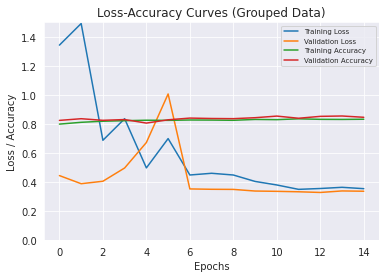

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')  # Set the plot style

plt.plot(ghistory.history['loss'], label='Training Loss')
plt.plot(ghistory.history['val_loss'], label='Validation Loss')
plt.plot(ghistory.history['accuracy'], label='Training Accuracy')
plt.plot(ghistory.history['val_accuracy'], label='Validation Accuracy')

plt.legend(loc='upper right', fontsize=7)  # Add a legend
plt.title('Loss-Accuracy Curves (Grouped Data)')  # Add a title
plt.xlabel('Epochs')  # Add x-axis label
plt.ylabel('Loss / Accuracy')  # Add y-axis label
plt.ylim([0, 1.5])  # Set y-axis limits to better visualize changes in the metrics

plt.show()
plt.close()


189/189 [==============================] - 0s 2ms/step


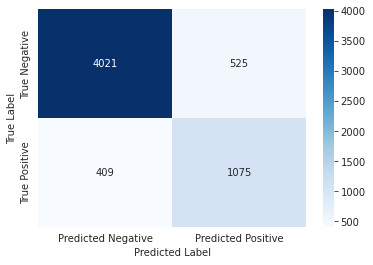

In [ ]:
# recat NN Conf
pred_ = gNorm_model.predict(gval_features)
preds_ = (pred_ > 0.5).astype(int)
tNconf = confusion_matrix(gval_labels, preds_)
tNconf_df = pd.DataFrame(tNconf, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(tNconf_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# recat NN scores
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# NORMALIZED-SCORES
accuracy = accuracy_score(gval_labels, preds_)
precision = precision_score(gval_labels, preds_)
recall = recall_score(gval_labels, preds_)
f1 = f1_score(gval_labels, preds_)

# Create the DataFrame
gNscores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Format the DataFrame using Styler
gNscores_df_styled = (gNscores_df.style
                   .format({'Score': '{:.2%}'})  # Format the scores as percentage
                   .applymap(add_bg_color, subset=['Score'])  # Add background color
                   .set_properties(**{'text-align': 'center', 'font-size': '16px'})  # Set text alignment and font size
                   .set_table_styles([
                       {'selector': 'th', 'props': [
                           ('background-color', '#303030'),  # header background color
                           ('color', 'white'),  # header text color
                           ('font-size', '16px'),  # header font size
                       ]},
                       {'selector': 'th.col_heading', 'props': [
                           ('background-color', '#2f4f4f'),  # Metric column background color
                       ]},
                   ])
                  )

# Display the styled DataFrame
gNscores_df_styled


,Metric,Score
0,Accuracy,84.51%
1,Precision,67.19%
2,Recall,72.44%
3,F1 Score,69.71%


## Grouped Random Forest

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

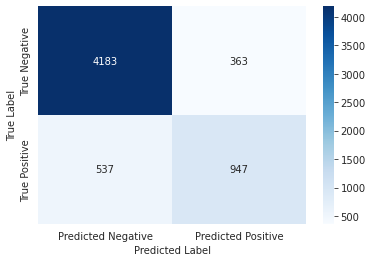

In [ ]:
#NORMALIZED
# New model
gFmodelNorm = RandomForestClassifier(n_estimators=100, random_state=42)
# FIt with normalized data
gFmodelNorm.fit(gtrain_features, gtrain_labels)
gFmodelNorm.score(gval_features, gval_labels)
gval_pred_ = gFmodelNorm.predict(gval_features)
gconf_=confusion_matrix(gval_labels, gval_pred_)
gconfNorm = pd.DataFrame(gconf_, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(gconfNorm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on validation data
gval_pred = gFmodelNorm.predict(gval_features)

# Calculate metrics
gacc = accuracy_score(gval_labels, gval_pred)
gprec = precision_score(gval_labels, gval_pred)
grec = recall_score(gval_labels, gval_pred)
gf1 = f1_score(gval_labels, gval_pred)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create the DataFrame
gscores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [gacc, gprec, grec, gf1]
})

# Define a function to add background color based on the scores
def add_bg_color(val):
    color = 'white'
    if val > 0.8:
        color = '#55a868'  # green
    elif val > 0.6:
        color = '#a1d99b'  # light green
    elif val > 0.4:
        color = '#fdae61'  # orange
    elif val > 0.2:
        color = '#f46d43'  # light red
    else:
        color = '#d73027'  # red
    return f'background-color: {color}'

# Format the DataFrame using Styler
gscores_df_styled = (gscores_df.style
                   .format({'Score': '{:.2%}'})  # Format the scores as percentage
                   .applymap(add_bg_color, subset=['Score'])  # Add background color
                   .set_properties(**{'text-align': 'center', 'font-size': '16px'})  # Set text alignment and font size
                   .set_table_styles([
                       {'selector': 'th', 'props': [
                           ('background-color', '#303030'),  # header background color
                           ('color', 'white'),  # header text color
                           ('font-size', '16px'),  # header font size
                       ]},
                       {'selector': 'th.col_heading', 'props': [
                           ('background-color', '#2f4f4f'),  # Metric column background color
                       ]},
                   ])
                  )

# Display the styled DataFrame
gscores_df_styled


,Metric,Score
0,Accuracy,85.07%
1,Precision,72.29%
2,Recall,63.81%
3,F1 Score,67.79%


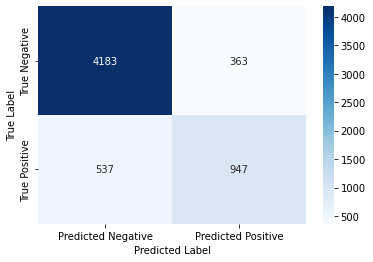

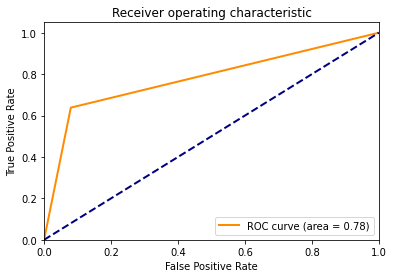

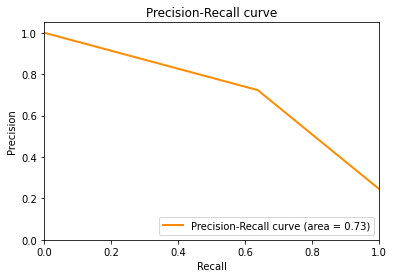

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
gconf = confusion_matrix(gval_labels, gval_pred_)
gconfNorm = pd.DataFrame(gconf, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
# print(gconfNorm)

sns.heatmap(gconfNorm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(gval_labels, gval_pred_)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(gval_labels, gval_pred_)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


Seems like normalization for both the grouped and non-grouped datasets increases true negative count and decreases true positive count.

Next Steps:

1. Examine True vs False ratio.
2. Also, Research how to properly analyze/compare confusion matrices.
3. In addition, after EDA explore whether to normalize different columns differently, e.g. z-score normalization, min-max, log normalization etc
4. Mention that we include dropout layers to prevent overfitting.

Two - tailed T-test

In [ ]:
# from scipy.stats import ttest_ind

# # assuming your datasets are NumPy arrays or Pandas dataframes
# # fledged = ...
# # grouped = ...

# # perform two-tailed t-test
# t_statistic, p_value = ttest_ind(fledged, grouped, equal_var=False)

# # print the results
# print("t-statistic:", t_statistic)
# print("p-value:", p_value)


In [ ]:
# Categoricals

['Workclass',
 'Education',
 'Marital-Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-Country']

In [ ]:
# # fledged = fledged.drop(Categoricals, axis=1)
# fledged

,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week,Income
0,39,77516,2174,0,40,<=50K
1,50,83311,0,0,13,<=50K
2,38,215646,0,0,40,<=50K
3,53,234721,0,0,40,<=50K
4,28,338409,0,0,40,<=50K
...,...,...,...,...,...,...
32556,27,257302,0,0,38,<=50K
32557,40,154374,0,0,40,>50K
32558,58,151910,0,0,40,<=50K
32559,22,201490,0,0,20,<=50K


In [ ]:
from scipy.stats import ttest_ind

# get the subset of columns that are present in both datasets
common_columns = list(set(fledged.columns).intersection(set(grouped.columns)))

# align the dataframes on the common columns and reindex to ensure order is consistent
fledged = fledged[common_columns].reindex(grouped.index)
grouped = grouped[common_columns]

# perform two-tailed t-test
t_statistic, p_value = ttest_ind(fledged, grouped, equal_var=False)

# print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
p-value: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
